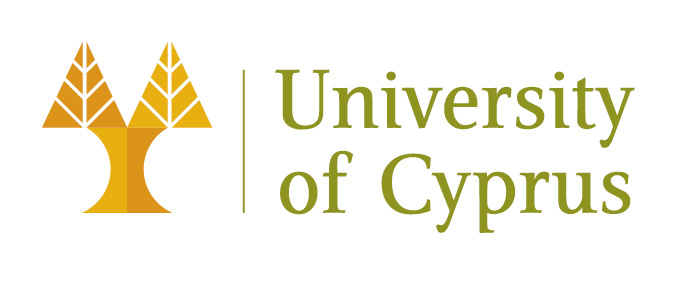

# Introduction to python: LECTURE 8: Advanced Modules & Built-in functions

## By: Panagiotis Herodotou

# Advanced Modules
## Collections Module

The collections module is a built-in module that implements specialized container data types providing alternatives to Python’s general purpose built-in containers. We've already gone over the basics: dict, list, set, and tuple.

Now we'll learn about the alternatives that the collections module provides.


## Counter

*Counter* is a *dict* subclass which helps count hashable objects. Inside of it elements are stored as dictionary keys and the counts of the objects are stored as the value.

Let's see how it can be used:

In [61]:
from collections import Counter

**Counter() with lists**

In [64]:
lst = [1,2,2,2,2,3,3,3,1,2,1,12,3,2,32,1,21,1,223,1]

Counter(lst)

Counter({1: 6, 2: 6, 3: 4, 12: 1, 32: 1, 21: 1, 223: 1})

**Counter with strings**

In [67]:
Counter('aabsbsbsbhshhbbsbs')

Counter({'b': 7, 's': 6, 'h': 3, 'a': 2})

**Counter with words in a sentence**

In [70]:
s = 'How many times does each word show up in this sentence word times each each word'

words = s.split()

Counter(words)

Counter({'each': 3,
         'word': 3,
         'times': 2,
         'How': 1,
         'many': 1,
         'does': 1,
         'show': 1,
         'up': 1,
         'in': 1,
         'this': 1,
         'sentence': 1})

In [72]:
# Methods with Counter()
c = Counter(words)

c.most_common(2)

[('each', 3), ('word', 3)]

### Common patterns when using the Counter() object

    sum(c.values())                 # total of all counts
    c.clear()                       # reset all counts
    list(c)                         # list unique elements
    set(c)                          # convert to a set
    dict(c)                         # convert to a regular dictionary
    c.items()                       # convert to a list of (elem, cnt) pairs
    Counter(dict(list_of_pairs))    # convert from a list of (elem, cnt) pairs
    c.most_common()[:-n-1:-1]       # n least common elements
    c += Counter()                  # remove zero and negative counts

## defaultdict

defaultdict is a dictionary-like object which provides all methods provided by a dictionary but takes a first argument (default_factory) as a default data type for the dictionary. Using defaultdict is faster than doing the same using dict.set_default method.

**A defaultdict will never raise a KeyError. Any key that does not exist gets the value returned by the default factory.**

In [77]:
from collections import defaultdict

In [79]:
d = {}

In [81]:
d['one'] 

KeyError: 'one'

In [83]:
d  = defaultdict(object)

In [85]:
d['one'] 

In [87]:
for item in d:
    print(item)

one


Can also initialize with default values:

In [90]:
d = defaultdict(lambda: 0)

In [92]:
d['one']

0

## namedtuple
The standard tuple uses numerical indexes to access its members, for example:

In [95]:
t = (12,13,14)

In [97]:
t[0]

12

For simple use cases, this is usually enough. On the other hand, remembering which index should be used for each value can lead to errors, especially if the tuple has a lot of fields and is constructed far from where it is used. A namedtuple assigns names, as well as the numerical index, to each member. 

Each kind of namedtuple is represented by its own class, created by using the namedtuple() factory function. The arguments are the name of the new class and a string containing the names of the elements.

You can basically think of namedtuples as a very quick way of creating a new object/class type with some attribute fields.
For example:

In [100]:
from collections import namedtuple

In [102]:
Dog = namedtuple('Dog',['age','breed','name'])

sam = Dog(age=2,breed='Lab',name='Sammy')

frank = Dog(age=2,breed='Shepard',name="Frankie")

We construct the namedtuple by first passing the object type name (Dog) and then passing a string with the variety of fields as a string with spaces between the field names. We can then call on the various attributes:

In [105]:
sam

Dog(age=2, breed='Lab', name='Sammy')

In [107]:
sam.age

2

In [109]:
sam.breed

'Lab'

In [111]:
sam[0]

2

## Conclusion

Hopefully you now see how incredibly useful the collections module is in Python and it should be your go-to module for a variety of common tasks!

# Built-in Functions

## map()

map() is a built-in Python function that takes in two or more arguments: a function and one or more iterables, in the form:

    map(function, iterable, ...)
    
map() returns an *iterator* - that is, map() returns a special object that yields one result at a time as needed. We will learn more about iterators and generators in a future lecture. For now, since our examples are so small, we will cast map() as a list to see the results immediately.

When we went over list comprehensions we created a small expression to convert Celsius to Fahrenheit. Let's do the same here but use map:

In [1]:
def fahrenheit(celsius):
    return (9/5)*celsius + 32
    
temps = [0, 22.5, 40, 100]

Now let's see map() in action:

In [2]:
F_temps = map(fahrenheit, temps)

#Show
list(F_temps)

[32.0, 72.5, 104.0, 212.0]

In the example above, map() applies the fahrenheit function to every item in temps. However, we don't have to define our functions beforehand; we can use a lambda expression instead:

In [3]:
list(map(lambda x: (9/5)*x + 32, temps))

[32.0, 72.5, 104.0, 212.0]

Great! We got the same result! Using map with lambda expressions is much more common since the entire purpose of map() is to save effort on having to create manual for loops.

### map() with multiple iterables
map() can accept more than one iterable. The iterables should be the same length - in the event that they are not, map() will stop as soon as the shortest iterable is exhausted.


For instance, if our function is trying to add two values **x** and **y**, we can pass a list of **x** values and another list of **y** values to map(). The function (or lambda) will be fed the 0th index from each list, and then the 1st index, and so on until the n-th index is reached.

Let's see this in action with two and then three lists:

In [4]:
a = [1,2,3,4]
b = [5,6,7,8]
c = [9,10,11,12]

list(map(lambda x,y:x+y,a,b))

[6, 8, 10, 12]

In [5]:
# Now all three lists
list(map(lambda x,y,z:x+y+z,a,b,c))

[15, 18, 21, 24]

We can see in the example above that the parameter **x** gets its values from the list **a**, while **y** gets its values from **b** and **z** from list **c**. Go ahead and play with your own example to make sure you fully understand mapping to more than one iterable.

Great job! You should now have a basic understanding of the map() function.

## reduce()

Many times students have difficulty understanding reduce() so pay careful attention to this lecture. The function reduce(function, sequence) continually applies the function to the sequence. It then returns a single value. 

If seq = [ s1, s2, s3, ... , sn ], calling reduce(function, sequence) works like this:

* At first the first two elements of seq will be applied to function, i.e. func(s1,s2) 
* The list on which reduce() works looks now like this: [ function(s1, s2), s3, ... , sn ]
* In the next step the function will be applied on the previous result and the third element of the list, i.e. function(function(s1, s2),s3)
* The list looks like this now: [ function(function(s1, s2),s3), ... , sn ]
* It continues like this until just one element is left and return this element as the result of reduce()

Let's see an example:

In [1]:
from functools import reduce

lst =[47,11,42,13]
reduce(lambda x,y: x+y,lst)

113

Lets look at a diagram to get a better understanding of what is going on here:

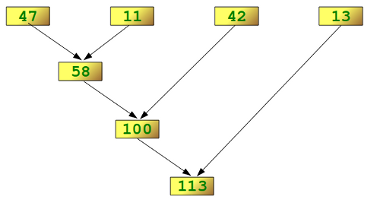

In [2]:
from IPython.display import Image
Image('http://www.python-course.eu/images/reduce_diagram.png')

Note how we keep reducing the sequence until a single final value is obtained. Lets see another example:

In [3]:
#Find the maximum of a sequence (This already exists as max())
max_find = lambda a,b: a if (a > b) else b

In [4]:
#Find max
reduce(max_find,lst)

47

Hopefully you can see how useful reduce can be in various situations. Keep it in mind as you think about your code projects!

## filter

The function filter(function, list) offers a convenient way to filter out all the elements of an iterable, for which the function returns True. 

The function filter(function,list) needs a function as its first argument. The function needs to return a Boolean value (either True or False). This function will be applied to every element of the iterable. Only if the function returns True will the element of the iterable be included in the result.

Like map(), filter() returns an *iterator* - that is, filter yields one result at a time as needed. Iterators and generators will be covered in an upcoming lecture. For now, since our examples are so small, we will cast filter() as a list to see our results immediately.

Let's see some examples:

In [1]:
#First let's make a function
def even_check(num):
    if num%2 ==0:
        return True

Now let's filter a list of numbers. Note: putting the function into filter without any parentheses might feel strange, but keep in mind that functions are objects as well.

In [2]:
lst =range(20)

list(filter(even_check,lst))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

filter() is more commonly used with lambda functions, because we usually use filter for a quick job where we don't want to write an entire function. Let's repeat the example above using a lambda expression:

In [3]:
list(filter(lambda x: x%2==0,lst))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

Great! You should now have a solid understanding of filter() and how to apply it to your code!

## zip

zip() makes an iterator that aggregates elements from each of the iterables.

Returns an iterator of tuples, where the i-th tuple contains the i-th element from each of the argument sequences or iterables. The iterator stops when the shortest input iterable is exhausted. With a single iterable argument, it returns an iterator of 1-tuples. With no arguments, it returns an empty iterator. 

zip() is equivalent to:

    def zip(*iterables):
        # zip('ABCD', 'xy') --> Ax By
        sentinel = object()
        iterators = [iter(it) for it in iterables]
        while iterators:
            result = []
            for it in iterators:
                elem = next(it, sentinel)
                if elem is sentinel:
                    return
                result.append(elem)
            yield tuple(result)
        

zip() should only be used with unequal length inputs when you don’t care about trailing, unmatched values from the longer iterables. 

Let's see it in action in some examples:

### Examples

In [1]:
x = [1,2,3]
y = [4,5,6]

# Zip the lists together
list(zip(x,y))

[(1, 4), (2, 5), (3, 6)]

Note how tuples are returned. What if one iterable is longer than the other?

In [2]:
x = [1,2,3]
y = [4,5,6,7,8]

# Zip the lists together
list(zip(x,y))

[(1, 4), (2, 5), (3, 6)]

Note how the zip is defined by the shortest iterable length. Its generally advised not to zip unequal length iterables unless your very sure you only need partial tuple pairings.

What happens if we try to zip together dictionaries?

In [3]:
d1 = {'a':1,'b':2}
d2 = {'c':4,'d':5}

list(zip(d1,d2))

[('a', 'c'), ('b', 'd')]

This makes sense because simply iterating through the dictionaries will result in just the keys. We would have to call methods to mix keys and values:

In [4]:
list(zip(d2,d1.values()))

[('c', 1), ('d', 2)]

Great! Finally lets use zip() to switch the keys and values of the two dictionaries:

In [5]:
def switcharoo(d1,d2):
    dout = {}
    
    for d1key,d2val in zip(d1,d2.values()):
        dout[d1key] = d2val
    
    return dout

In [6]:
switcharoo(d1,d2)

{'a': 4, 'b': 5}

## enumerate()

In this lecture we will learn about an extremely useful built-in function: enumerate(). Enumerate allows you to keep a count as you iterate through an object. It does this by returning a tuple in the form (count,element). The function itself is equivalent to:

    def enumerate(sequence, start=0):
        n = start
        for elem in sequence:
            yield n, elem
            n += 1

### Example

In [1]:
lst = ['a','b','c']

for number,item in enumerate(lst):
    print(number)
    print(item)

0
a
1
b
2
c


enumerate() becomes particularly useful when you have a case where you need to have some sort of tracker. For example:

In [2]:
for count,item in enumerate(lst):
    if count >= 2:
        break
    else:
        print(item)

a
b


enumerate() takes an optional "start" argument to override the default value of zero:

In [3]:
months = ['March','April','May','June']

list(enumerate(months,start=3))

[(3, 'March'), (4, 'April'), (5, 'May'), (6, 'June')]

## all() and any()

all() and any() are built-in functions in Python that allow us to conveniently check for boolean matching in an iterable. all() will return True if all elements in an iterable are True. It is the same as this function code:

    def all(iterable):
        for element in iterable:
            if not element:
                return False
        return True
        
any() will return True if any of the elements in the iterable are True. It is equivalent to the following function code:

    def any(iterable):
        for element in iterable:
            if element:
                return True
        return False
        

Let's see a few examples of these functions. They should be fairly straightforward:

In [1]:
lst = [True,True,False,True]

In [2]:
all(lst)

False

Returns False because not all elements are True.

In [3]:
any(lst)

True

Returns True because at least one of the elements in the list is True

## complex()

complex() returns a complex number with the value real + imag*1j or converts a string or number to a complex number. 

If the first parameter is a string, it will be interpreted as a complex number and the function must be called without a second parameter. The second parameter can never be a string. Each argument may be any numeric type (including complex). If imag is omitted, it defaults to zero and the constructor serves as a numeric conversion like int and float. If both arguments are omitted, returns 0j.

If you are doing math or engineering that requires complex numbers (such as dynamics, control systems, or impedance of a circuit) this is a useful tool to have in Python.

Let's see some examples:

In [1]:
# Create 2+3j
complex(2,3)

(2+3j)

In [2]:
complex(10,1)

(10+1j)

We can also pass strings:

In [9]:
complex('12+2j')

(12+2j)